In [196]:
import re
from collections import defaultdict

import pandas as pd
import tqdm

In [37]:
NROWS = 1000
path_to_sam = '../data/filtered_gisaid_hcov-19_2020_11_29_high_qualily.fasta.sam'
sam = pd.read_table(path_to_sam, 
                    skiprows=1, 
                    header=None,
                    usecols=[3, 5, 9],
                    nrows=NROWS,
                   )
sam.columns = ['start_site', 'cigar', 'seq']
sam.start_site -= 1

In [187]:
path_to_ref = "../data/covid_ref.fasta"
with open(path_to_ref) as rfin:
    rfin.readline()
    reference = rfin.read().replace('\n', '').upper()

In [188]:
s = sam.cigar.iloc[0]
s

'3453M2D19M1I22M2D7M1D11M1I4M1D14M7D25M2I3M7I16M1I35M5D24M1D8M1D21M1I5M3I25M1D16M1I3M2I4M2I26046M'

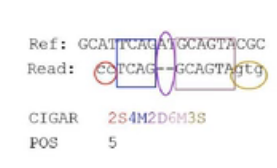

In [53]:
def split_cigar(cigar):
    return re.findall('\d+[MIDNSHP]', cigar)

In [85]:
n = 240
ss = 54
seq[:n-ss] == reference[ss:n]

True

In [93]:
i = 0
reference[n-i], seq[n-ss-i]

('C', 'T')

In [90]:
seq[n-ss-2]

'T'

In [66]:
n, ss

(3453, 3507)

In [205]:
freqs = [defaultdict(int) for _ in range(len(reference))]
nucls = set('ATGC')

for i, (ss, cigar, seq) in tqdm.tqdm(sam.iterrows()):
    seq = seq.upper()
    cur_seq_site = 0

    spl_cigar = split_cigar(cigar)
    for cig in spl_cigar:
        n = int(cig[:-1])
        key = cig[-1]
        if key == "M":
            for j in range(n):
                if reference[ss] != seq[cur_seq_site]:
                    if seq[cur_seq_site] in nucls:
                        freqs[ss][seq[cur_seq_site]] += 1
                ss += 1
                cur_seq_site += 1            
        elif key == "D":
            ss += n
        elif key == 'I':
            cur_seq_site += n
        else:
            ss += n
            cur_seq_site += n
    
    if i == 200: break

IndexError: string index out of range

In [201]:
cigar

'1S29902M'

In [200]:
# reference[ss] != seq[cur_seq_site]
len(reference), ss, n, len(seq), cur_seq_site

(29903, 29903, 29902, 29903, 29902)

In [186]:
i = 20
seq[23402 - 54: 23402 - 54 + i], reference[23402: 23402 + i]

('GCACAGAAGTCCCTGTTGCT', 'ATGTTAACTGCACAGAAGTC')

In [174]:
len(seq)

29773

In [195]:
[(i,x) for i, x in enumerate(freqs) if len(x) > 0]

[(3, defaultdict(int, {'T': 14})),
 (6, defaultdict(int, {'A': 14})),
 (8, defaultdict(int, {'G': 14})),
 (11, defaultdict(int, {'T': 14})),
 (12, defaultdict(int, {'A': 14})),
 (13, defaultdict(int, {'T': 14})),
 (14, defaultdict(int, {'A': 14})),
 (16, defaultdict(int, {'C': 14})),
 (18, defaultdict(int, {'T': 14})),
 (21, defaultdict(int, {'C': 14})),
 (22, defaultdict(int, {'A': 14})),
 (24, defaultdict(int, {'G': 14})),
 (25, defaultdict(int, {'T': 14})),
 (27, defaultdict(int, {'A': 14})),
 (28, defaultdict(int, {'C': 14})),
 (31, defaultdict(int, {'A': 14})),
 (33, defaultdict(int, {'C': 14})),
 (35, defaultdict(int, {'A': 14})),
 (37, defaultdict(int, {'C': 14})),
 (39, defaultdict(int, {'A': 14})),
 (40, defaultdict(int, {'C': 14})),
 (43, defaultdict(int, {'T': 14})),
 (44, defaultdict(int, {'C': 14})),
 (45, defaultdict(int, {'G': 14})),
 (46, defaultdict(int, {'A': 14})),
 (47, defaultdict(int, {'T': 14})),
 (48, defaultdict(int, {'C': 14})),
 (49, defaultdict(int, {'T': 14

In [41]:
sam.head()

,start_site,cigar,seq
0,54,3453M2D19M1I22M2D7M1D11M1I4M1D14M7D25M2I3M7I16...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
1,54,29782M,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
2,54,22574M4D17M2I20M1D26M1I3M1I5M2I6M1I13M4I9M1I14...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
3,54,22467M1D19M1I7295M,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
4,54,29782M,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...
